In [20]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [22]:
data = sio.loadmat('C:\\Users\\Administrator\\Desktop\\ex3data1.mat')
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011', '__version__': '1.0', '__globals__': [], 'X': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'y': array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)}


In [24]:
raw_x = data['X']
raw_y = data['y']
print(raw_x.shape,raw_y.shape)

(5000, 400) (5000, 1)


#随机取出一张图片

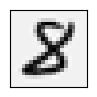

In [27]:
def plot_an_image(X):
    pick_one = np.random.randint(5000)
    image = X[pick_one,:].reshape(20,20)
    fig,ax = plt.subplots(figsize=(1,1))
    ax.imshow(image.T,cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.show()

plot_an_image(raw_x)

#随机取出100张图片

[1549 3431 3734 3147 1948 2733 4530  611 1322 3480 3651 3402   90 1855
 3255  347 4019  134 3746  893 3360 2622 2669  275  857 1607 4681 3953
 3227 3178 4644 4673 1627 4115 3333 2605 3178 2497 4047 2451 2370 1181
 1498  395 4932 3170 3506 2116 3024 1129 3815 1092 2665 1924  435  891
 4770 3127 3139 1440 2016  284  835 3037 3825 3220 3894 2589 2937  471
 4948 2300 2291 2333 1211 4028 4118 2961 4947 1671 3588 2214  112 3990
  983 4116 2927 1973 4897  903 1685 3195 3530 1334 3282 4786 3315  143
 3551 1389]
2
(100, 400)


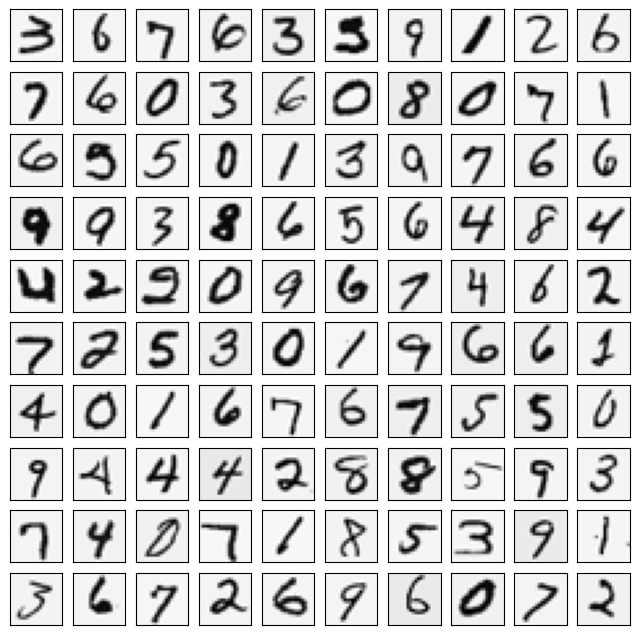

In [30]:
def plot_100_image(X):
    image_index = np.random.choice(len(X),100)
    print(image_index)
    #生成图像矩阵
    images = X[image_index,:]
    print(images.ndim)
    print(images.shape)
    fig,ax = plt.subplots(nrows=10,ncols=10,figsize=(8,8),sharex=True,sharey=True)
    for i in range(10):
        for j in range(10):
            ax[i,j].imshow(images[i*10+j].reshape(20,20).T,cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.show()

plot_100_image(raw_x)

In [70]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def costFunction(theta,x,y,lamda):
    A = sigmoid(x @ theta)
    first = y * np.log(A)
    second = (1-y) * np.log(1-A)
    reg = theta[1:] @ theta[1:] * lamda / (2*len(x))
    #记得用np.sum进行运算
    return -np.sum(first+second) / len(x) + reg

#只需要梯度向量
#梯度下降不需要迭代整个过程
def gradient_reg(theta,x,y,lamda):
    reg = theta[1:] * lamda / len(x)
    #向reg数组第一行插入一个值为0的元素
    reg = np.insert(reg,0,values=0,axis=0)
    first = (X.T @ (sigmoid(x @ theta) - y)) / len(x)
    return first + reg

#数据处理
# 将输入数据 X 矩阵中的第一列插入一个值为 1 的向量
# 这个向量代表偏置项（bias term），也就是偏移量或截距
# 在每个样本的特征向量前面添加一个 1，表示该特征向量中的偏置项取值为 1
# 添加偏置项1，可以将模型中的截距项权重独立出来，方便模型的求解和表达。
# 同时，添加偏置项也可以使得模型对数据集的拟合能力更强，提高模型的泛化能力。

In [73]:
X = np.insert(raw_x,0,values=1,axis=1)
y = raw_y.flatten()
print(X.shape)
print(y.shape)

(5000, 401)
(5000,)


多分类算法

In [76]:
from scipy.optimize import minimize
def one_vs_all(X,y,lamda,k):
    n = X.shape[1]
    theta_all = np.zeros((k,n))

    for i in range (1,k+1):
      theta_i = np.zeros(n,)
      res = minimize(fun=costFunction,x0 = theta_i,args=(X,y==i,lamda),method='TNC',jac=gradient_reg)
      theta_all[i-1,:] = res.x
    return theta_all

In [78]:
lamda = 1
k = 10

In [80]:
theta_final = one_vs_all(X,y,lamda,k)

In [82]:
theta_final

array([[-2.38301230e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.30434175e-03, -7.40003732e-10,  0.00000000e+00],
       [-3.18588120e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.45858778e-03, -5.08315413e-04,  0.00000000e+00],
       [-4.79483718e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.86628040e-05, -2.46838905e-07,  0.00000000e+00],
       ...,
       [-7.98900972e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.94542182e-05,  7.21045847e-06,  0.00000000e+00],
       [-4.57182010e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.33622521e-03,  9.98633700e-05,  0.00000000e+00],
       [-5.40510945e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.16565605e-04,  7.87250688e-06,  0.00000000e+00]])

In [86]:
def predict(X,theta):
    h = X @ theta.T
    h_argmax = np.argmax(h,axis=1)
    return h_argmax + 1

In [88]:
y_pred =predict(X,theta_final)
accuracy = np.mean(y_pred == y)
accuracy

0.9446